# Inizio ad esplorare il mio database

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
CeseTot = pd.read_pickle("data/datiBasePuliti/validi/Cese_2003-2024.pickle")
CeseTot

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia
0,2003,Tiozzo Giulio,1,(Piemonte),5,7,7,7,6,7,7,41,ORO
1,2003,Mantova Vincenzo,2,(Lombardia),5,7,7,7,7,7,5,40,ORO
2,2003,Barbieri Luca,3,(Lombardia),3,7,7,7,4,4,7,36,ORO
3,2003,D'Aurizio Jacopo,3,(Abruzzo),5,7,2,7,6,7,7,36,ORO
4,2003,Ghiraldin Francesco,3,(Veneto),5,7,7,7,7,7,1,36,ORO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,2024,Saggiorato Leonardo,292,(),-1,0,3,0,0,0,0,3,-
6580,2024,Miccichè Calogero,293,(),-1,0,2,0,0,0,0,2,-
6581,2024,Celebre Francesco,293,(),-1,0,0,2,0,0,0,2,-
6582,2024,La Malfa Salvatore,295,(),-1,0,0,0,0,0,0,0,-


In [4]:
NumPresenze = CeseTot.groupby("studente").size().sort_values(ascending=False)
len( NumPresenze[ NumPresenze >= 5] )

60

In [5]:
len( NumPresenze[NumPresenze == 4] )

168

In [6]:
len( NumPresenze[NumPresenze == 3] )

362

In [7]:
len( NumPresenze[NumPresenze == 2] )

851

In [8]:
len( NumPresenze[NumPresenze == 1] )

2822

In [9]:
print("La probabilità che uno passi 5 volte, tra quelli che passano almeno una volta, è: ",100*60/(60+168+362+851+2822),"%", sep="")

La probabilità che uno passi 5 volte, tra quelli che passano almeno una volta, è: 1.4074595355383532%


In [10]:
ClassePresenze = CeseTot.groupby("classe").size().sort_values(ascending=False)
ClassePresenze

classe
 5    2058
-1    1817
 4    1346
 3     688
 2     541
 1     134
dtype: int64

### Abbiamo appena smentito la credenza secondo la quale è più facile passare in seconda che in terza

In [11]:
CeseTot.describe()

,anno,posizione,classe,es1,es2,es3,es4,es5,es6,tot
count,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000
mean,2013.494684,144.002430,2.602825,4.796021,3.556349,2.403402,1.677248,0.824575,0.408414,13.666009
std,6.321766,85.238276,2.424255,2.750638,2.917913,2.743934,2.407112,1.592573,1.105877,8.486897
min,2003.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,68.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,2013.000000,141.000000,4.000000,7.000000,4.000000,1.000000,0.000000,0.000000,0.000000,13.000000
75%,2019.000000,218.000000,5.000000,7.000000,7.000000,5.000000,3.000000,1.000000,0.000000,19.000000
max,2024.000000,306.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,42.000000


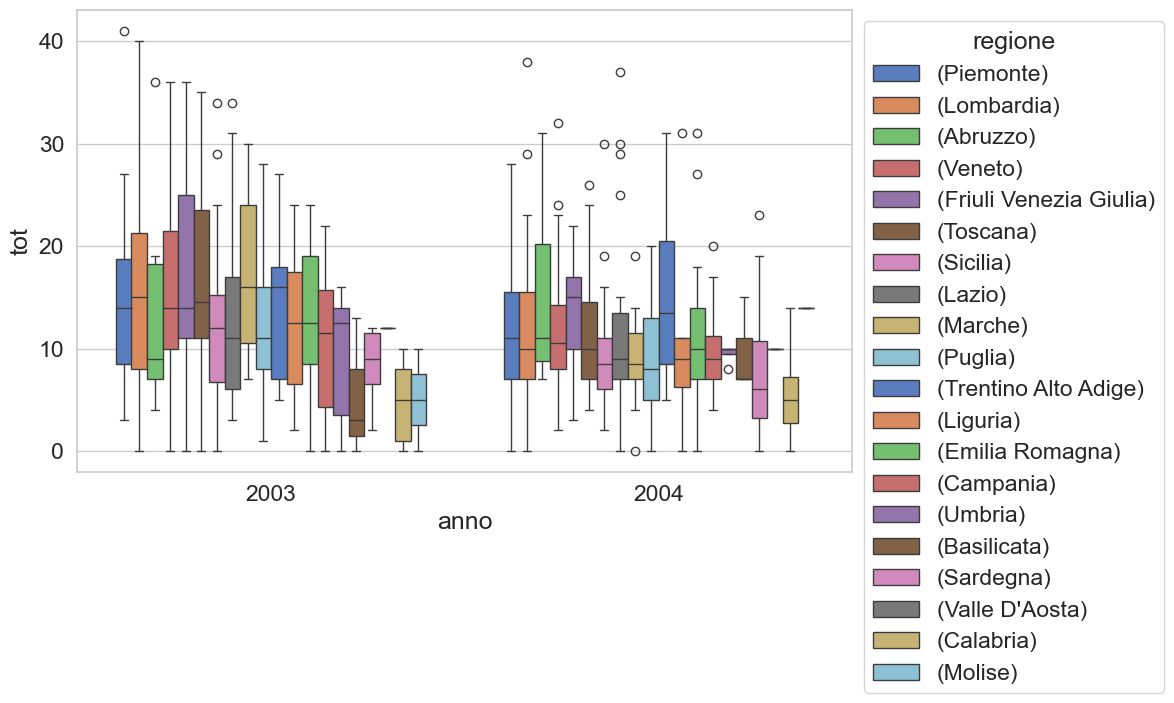

In [12]:
sns.set( style="whitegrid", font_scale=1.5)
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(CeseTot[ CeseTot["anno"] <= 2004 ], y = "tot", x= "anno", hue='regione', palette = 'muted')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

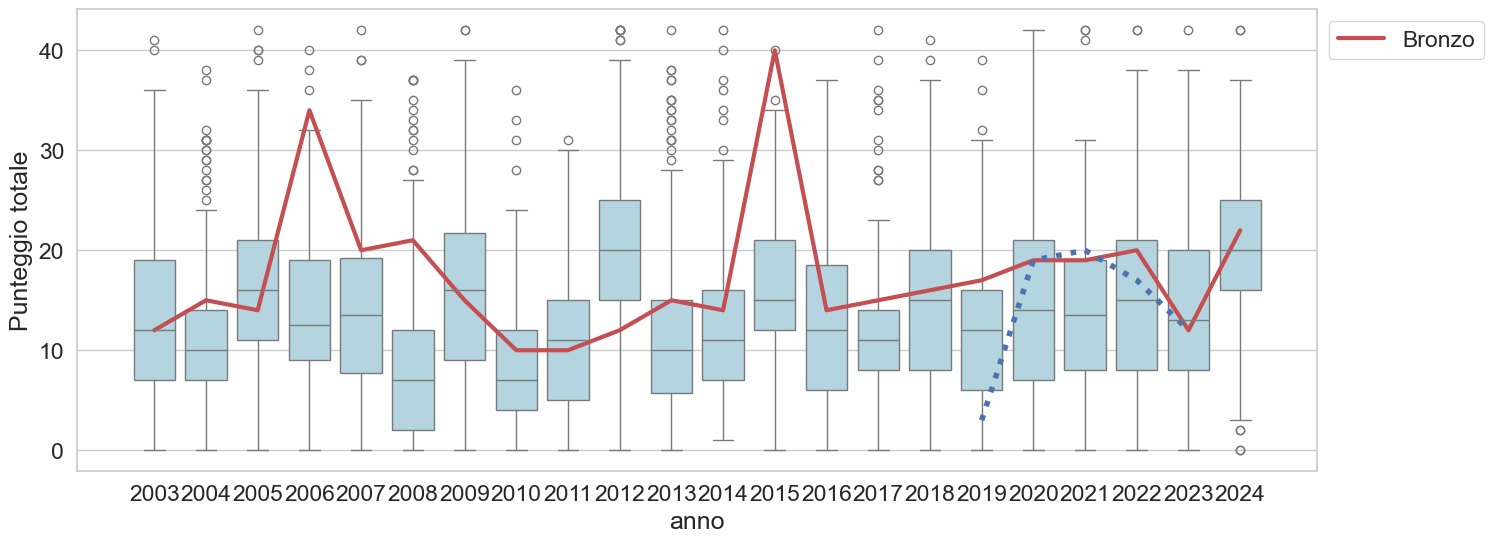

In [13]:
sns.set( style="whitegrid", font_scale=1.5)
fig, ax = plt.subplots(figsize = (16, 6))

x = np.linspace(0, 21, 22)
x = x.astype(int)
b = [12, 15, 14, 34, 20, 21, 15, 10, 10, 12, 15, 14, 40, 14, 15, 16, 17, 19, 19, 20, 12, 22]

sns.boxplot(CeseTot, y = "tot", x= "anno", color="LightBlue"); #hue='regione', palette = 'muted')
plt.plot(x, b, "-r", label="Bronzo", linewidth=3)
plt.plot([16, 17, 18, 19, 20], [3, 19, 20, 17, 12], ":b", linewidth=4)
ax.set_ylabel("Punteggio totale")
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

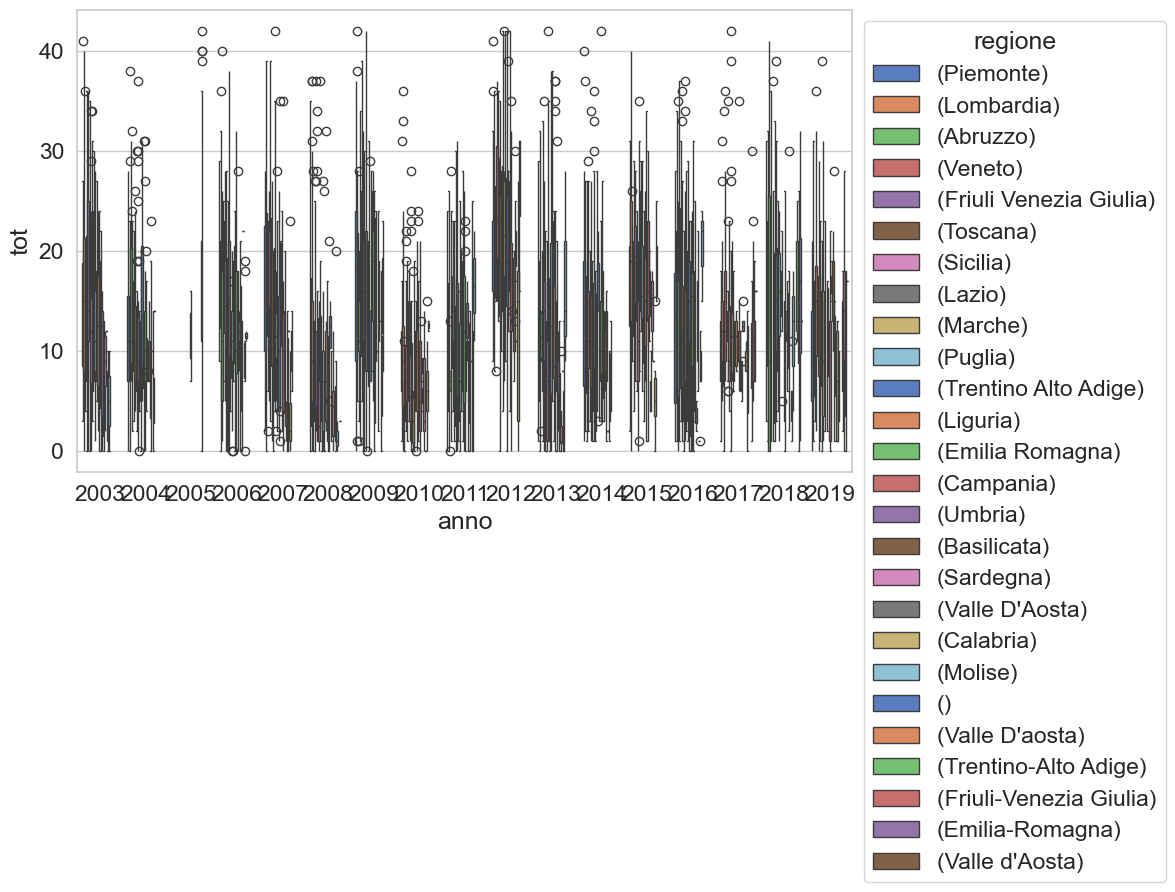

In [14]:
sns.set( style="whitegrid", font_scale=1.5)
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(CeseTot[ CeseTot["anno"] <= 2019 ], y = "tot", x= "anno", hue='regione', palette = 'muted')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));